In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pandas as pd

sns.set_theme()

In [93]:
df = pd.read_csv("data\Scrapping_03-12-23_12-10-44.csv", na_values="--" ,sep=",")
# df["opoznienie"] = df['opoznienie'].replace('--',np.nan)

Na których stacjach pojawia się opóźnienie?

In [96]:
df.tail(10)

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
92538,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Ciechanów,24.12,12:25,12:48,23.0
92539,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Nowy Dwór Mazowiecki,24.12,12:56,13:25,29.0
92540,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Legionowo,24.12,13:06,13:38,32.0
92541,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Wschodnia,24.12,13:21,13:55,34.0
92542,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Centralna,24.12,13:30,14:04,34.0
92543,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Zachodnia,24.12,14:00,14:26,26.0
92544,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Opoczno Południe,24.12,15:08,15:49,41.0
92545,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Włoszczowa Północ,24.12,15:41,16:28,47.0
92546,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Miechów,24.12,16:18,16:58,40.0
92547,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Kraków Główny,24.12,16:50,17:29,39.0


In [62]:
len(df['stacja_pomiaru'].unique()) # pomiary na 465 stacjach


465

In [63]:
df2 = df[["stacja_pomiaru", "opoznienie"]]
# df2["opoznienie"] = df2['opoznienie'].replace('--',np.nan)
df2["opoznienie"] = pd.to_numeric(df2["opoznienie"])
# df2.info()

c:\Users\Huawei\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
sum_delay = df2.groupby(["stacja_pomiaru"]).sum()

In [65]:
sum_delay #łączne opóźnienie na poszczególnych stacjach w przeciągu 3 msc
# df2

,opoznienie
stacja_pomiaru,
Aleksandrów Kujawski,1464.0
Augustów,212.0
Babiak,94.0
Babimost,50.0
Baciuty,220.0
...,...
Żegiestów-Zdrój,172.0
Żmigród,1664.0
Żory,468.0


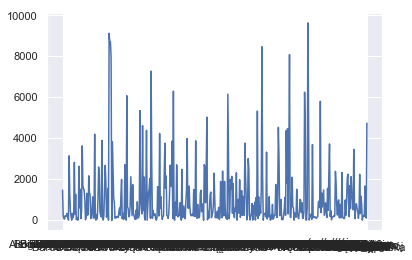

In [50]:
plt.plot(sum_delay) # bez sensu XDD

opóźnienie na końcowej stacji, z jakim opóźnieniem przyjechał do celu? 
- rozdzielić nazwy pociągu
- przefiltrować, zostawić wiersze z pomiarem końcowej stacji
- wyjdą opóźnienia każdego przejazdu

policzyć średnie opóźnienia dla poszczególnych nazw pociągu (np SILESIA)
- policzyć średnią opóźnień poszczególnych pociągów
- wyplotować nazwy tych pociągów i średnie opóźnienie (porównanie tras)

In [108]:
# len(df["nazwa_pociagu"].unique()) #423 pociągi/ przejzadów
# df["nazwa_pociagu"].unique()


df3 = df[df["stacja_koncowa"] == df["stacja_pomiaru"]] # same pomiary z przyjazdu na końcową stacje

# df3["opoznienie"] = pd.to_numeric(df3["opoznienie"])
# df3[['kod_pociagu', 'id_pociagu','nazwa']] = df["nazwa_pociagu"].apply(lambda x: pd.Series(str(x).split(" ")))

# df3[["nazwa_pociagu","opoznienie","stacja_poczatkowa","stacja_koncowa"]].groupby(['nazwa_pociagu']).min().head(20) #chuj nie wiem xdddd

df3 = df3[['nazwa_pociagu','opoznienie']]
df3[df3['nazwa_pociagu'] == df3['nazwa_pociagu'].split()[-1]]

AttributeError: 'Series' object has no attribute 'split'

In [105]:
# w zależności od pociągu
mean_delay_train = {x: np.mean(df[df['nazwa_pociagu']==x]['opoznienie']) for x in set(df['nazwa_pociagu'])}

In [109]:
mean_delay_train #423 pociągi

{'EIJ 7322/3 BARBAKAN': 13.779166666666667,
 'EIJ 4520/1 HUTNIK': 3.748815165876777,
 'MPM 36102/3 SUDETY': 2.1041666666666665,
 'EIE 6500/1 POMORZANIN': 6.69551282051282,
 'EIE 2701/0 HETMAN': 12.557471264367816,
 'MPE 81108/9 WŁÓKNIARZ': 3.7806451612903227,
 'MPE 17102/3 ZIELONOGÓRZANIN': 1.2797619047619047,
 'MPE 19130/1 ZOSIA': 8.154761904761905,
 'MPE 61103/2 DĄBROWSKA': 2.9,
 'MPM 63102/3 SUDETY': 2.4166666666666665,
 'MPE 18109/8 WŁÓKNIARZ': 0.8051948051948052,
 'EIJ 6129/8 OLEŃKA': 19.596385542168676,
 'MPS 66150 ŚNIEŻKA': 6.045454545454546,
 'MPE 18105/4 RYBAK': 18.70769230769231,
 'EIE 5450/1 WYSOCKI': 1.9420289855072463,
 'ECE 44000 MORAVIA': 3.6527777777777777,
 'MPE 38106/7 ZEFIR': 1.162280701754386,
 'ECE 41000/1 SILESIA': 7.732142857142857,
 'EIJ 4504/5': 3.5357142857142856,
 'MPS 60151 ŚNIEŻKA': 7.787878787878788,
 'EIJ 1100/1 NAREW': 3.4210526315789473,
 'MPE 18100/1 GAŁCZYŃSKI': 1.905829596412556,
 'EIJ 4120/1 DASZYŃSKI': 0.6979166666666666,
 'MPS 20100/1 HETMAN': 0.5

In [104]:
# mean_delay = {x: np.mean(df[df["stacja_pomiaru"] == x]["opoznienie"]) for x in set(df["stacja_pomiaru"])}
set(df['nazwa_pociagu'])

{'ECE 14000/1 SILESIA',
 'ECE 14002/3 POLONIA',
 'ECE 14004/5 BATORY',
 'ECE 14006/7 SILESIA',
 'ECE 14008/9 SILESIA',
 'ECE 17000/1 BERLIN-WARSZAWA-EXPR',
 'ECE 17002/3 BERLIN-WARSZAWA-EXPR',
 'ECE 17004/5 BERLIN-WARSZAWA-EXPR',
 'ECE 17008/9 BERLIN-WARSZAWA-EXPR',
 'ECE 17010/1 BERLIN-WARSZAWA-EXPR',
 'ECE 37000/1 WAWEL',
 'ECE 40001 MORAVIA',
 'ECE 41000/1 SILESIA',
 'ECE 41002/3 POLONIA',
 'ECE 41004/5 BATORY',
 'ECE 41006/7 SILESIA',
 'ECE 41008/9 SILESIA',
 'ECE 44000 MORAVIA',
 'ECE 45000/1 SOBIESKI',
 'ECE 54000/1 SOBIESKI',
 'ECE 57000/1 GEDANIA',
 'ECE 71000/1 BERLIN-WARSZAWA-EXPR',
 'ECE 71002/3 BERLIN-WARSZAWA-EXPR',
 'ECE 71004/5 BERLIN-WARSZAWA-EXPR',
 'ECE 71008/9 BERLIN-WARSZAWA-EXPR',
 'ECE 71010/1 BERLIN-WARSZAWA-EXPR',
 'ECE 73000/1 WAWEL',
 'ECE 75000/1 GEDANIA',
 'EIE 1350/1 TATRY',
 'EIE 1410/1 ONDRASZEK',
 'EIE 1510/1 SŁOWINIEC',
 'EIE 1512/3 WYBRZEŻE',
 'EIE 1532/3 KOCIEWIE',
 'EIE 1600/1 PANORAMA',
 'EIE 1628/9 OLEŃKA',
 'EIE 1650/1 ŚNIEŻKA',
 'EIE 1800/1 CHROB